In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons

In [32]:
X, y = make_moons(n_samples=1000, noise=0.4)

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

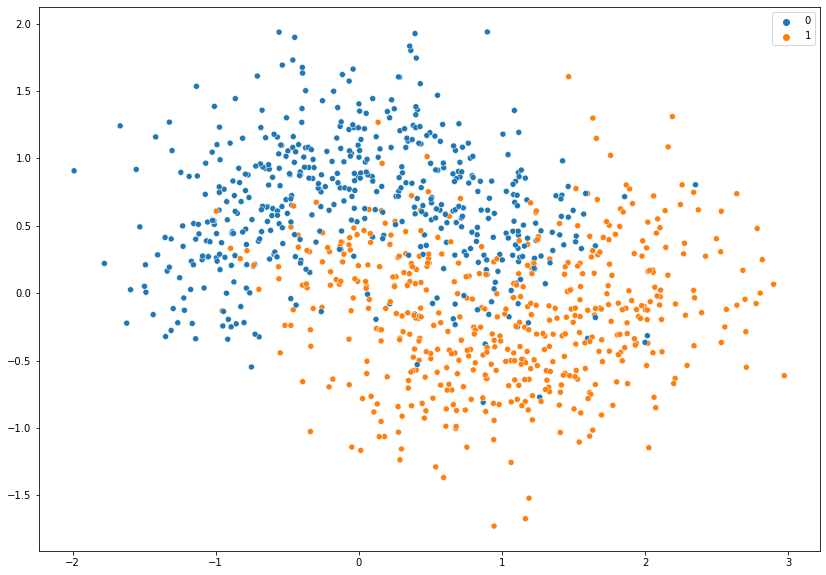

In [34]:
plt.figure(figsize=(14, 10))
sns.scatterplot(X[:,0], X[:,1], hue=y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
model = DecisionTreeClassifier()

In [37]:
max_leaf_nodes = [2, 3, 4, 5, 6, 7, 8, 9, 10]
param_grid = {'max_leaf_nodes' : max_leaf_nodes}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='accuracy')

In [38]:
grid_search.best_params_

{'max_leaf_nodes': 6}

In [40]:
model = grid_search.best_estimator_

In [41]:
y_pred = model.predict(X_test)

In [42]:
acc = accuracy_score(y_pred, y_test)
roc_auc = roc_auc_score(y_pred, y_test)
print(f'accuracy: {acc}')
print(f'auc_roc: {roc_auc}')

accuracy: 0.885
auc_roc: 0.885
